**Mileage Prediction - Regression Analysis**

**Data Source:**

This dataset was taken from the StatLin library which is maintained at camegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition

**Data Set Information:**

This dataset is a Slightly modifide version of the dataset provied in the StaLib library in line with the use by Ross Quinlan(1993) in predicting the attribute 'mpg',8 of the original instance were removed because they had unknown value for the 'mpg' attribute. The original dataset is available in the 'auto-mpg.data-original'.

**Attribute Information:**

1.mpg: continuous

2.cylinders: multi-valued discrete

3.displacement: continuous

4.horsepower: continuous

5.weight: continuous

6.acceleration: continuous

7.model year: multi-valued discrete

8.origin: multi-valued discrete

9.car name: string (unique for each instance)

**Import Library**

In [1]:

import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

**Import Data**

In [5]:

df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [6]:

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Data Preprocessing**

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:

df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


**Remove Missing Values**

In [11]:

df = df.dropna()

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

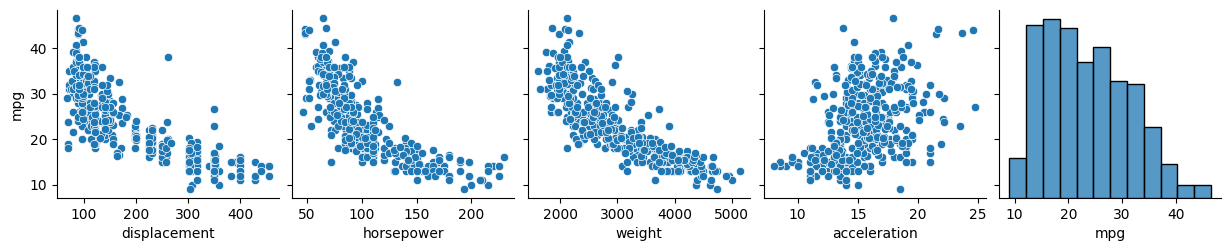

In [13]:

sns.pairplot(df, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')


<Axes: xlabel='displacement', ylabel='mpg'>

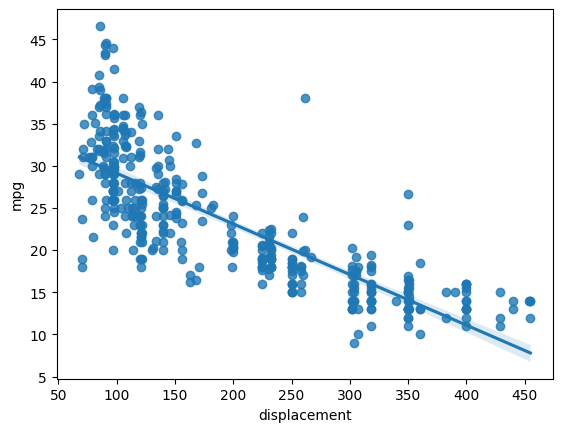

In [14]:

sns.regplot(x = 'displacement', y = 'mpg', data = df)

**Define Target Variable y and Feature X**

In [15]:

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:

y = df['mpg']

In [17]:
y.shape

(392,)

In [18]:

x = df[['displacement', 'horsepower', 'weight', 'acceleration']]


In [19]:
x.shape

(392, 4)

**Scaling Data**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:

ss = StandardScaler()

In [22]:
x = ss.fit_transform(x)

In [23]:

pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Train Test Split Data**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7)


In [26]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Model**

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:

lr.fit(xtrain, ytrain)

LinearRegression()

In [30]:
lr.intercept_

23.426439787229008

In [31]:

lr.coef_


array([-1.45406327, -1.79587837, -3.79680466, -0.5443539 ])

**Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error**

**Predict Test Data**

In [32]:
y_pred = lr.predict(xtest)

In [33]:

y_pred

array([21.57374764, 20.54416591, 19.06907848, 30.19570375, 15.24574346,
       22.69195704, 27.46415719, 28.46261323, 27.51400536, 29.68026585,
       30.0167674 , 25.46061253, 12.13631156, 25.17755992, 15.95717385,
       10.70648782, 25.08190716, 30.11143416, 22.93998262, 27.97511128,
       19.79734424, 31.33173905, 27.60746585,  9.61473732, 31.7573867 ,
       11.52468004, 31.11631799, 29.55038022, 29.32270974, 15.76933876,
       15.19017044, 23.88434958, 26.39771715, 14.19596168, 12.35432939,
       29.77282148, 30.52711581, 27.93046632, 27.22154313, 14.28721402,
       19.15576305, 25.85783979, 22.07071957, 30.30715288, 13.33123823,
       33.28202777, 30.80503165, 20.82176822, 27.10437857, 29.44115106,
       24.63089318, 31.17743922, 14.14889777, 25.1016189 , 16.55629558,
       25.38234699,  8.78666984, 23.61570056, 29.55038022, 32.42095445,
       25.78264804, 25.30638129, 22.21152184, 14.05660434, 21.15373576,
       29.19087768, 29.63058825, 23.69201581, 29.25667937, 31.00

**Model Accuracy**

In [34]:

from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [35]:
mean_absolute_error(ytest, y_pred)

3.163405335953969

In [36]:
mean_absolute_percentage_error(ytest, y_pred)

0.13579474858598875

In [37]:

r2_score(ytest, y_pred)

0.7021096143181463

**Polynomial Regression**

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:

poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [40]:

x_train2 = poly.fit_transform(xtrain)


In [41]:

x_test2 = poly.fit_transform(xtest)

In [42]:
lr.fit(x_train2, ytrain)

LinearRegression()

In [43]:
lr.intercept_

21.08977149790141

In [44]:
lr.coef_

array([-2.77522192, -5.15108364, -1.41967791, -1.31612083,  1.49235678,
        0.59561869, -0.01856359,  0.56847571, -0.58053655,  0.99360358])

In [45]:

y_pred_poly = lr.predict(x_test2)

**Model Evaluation**

In [46]:
mean_absolute_error(ytest, y_pred_poly)

2.84609404266826

In [47]:

mean_absolute_percentage_error(ytest, y_pred_poly)

0.11605543816556729

In [48]:
r2_score(ytest, y_pred_poly)

0.7444696866683332

**Explaination:**

The mission is to predict the mileage of a particular car in city driving, given data of some parameters (features) for hundreds of cars.

This project uses UCI dataset of almost 400 cars with accurate values of following parameters.

The idea is to train a machine learning model to learn the relationship (weights for regression equation) between dependent variable (y) and independent variables or features (x1, x2, x3 etc).

It’s obvious that the mileage of a vehicle doesn’t depend purely on only these parameters. There are several other factors in play like direction and strength of wind, city roads, city traffic, weather, driver experience and ability etc.